# Rice Leaf Diseases Classification

Dataset: [Rice Leaf Diseases Dataset](https://data.mendeley.com/datasets/dwtn3c6w6p/1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array
from tensorflow.keras import layers

## Load Dataset

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/Rice Leaf Diseases"

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128, 128),
    batch_size=32)

Found 4684 files belonging to 3 classes.
Using 3748 files for training.


In [ ]:
val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=32)

Found 4684 files belonging to 3 classes.
Using 936 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['Bacterialblight', 'Brownspot', 'Leafsmut']

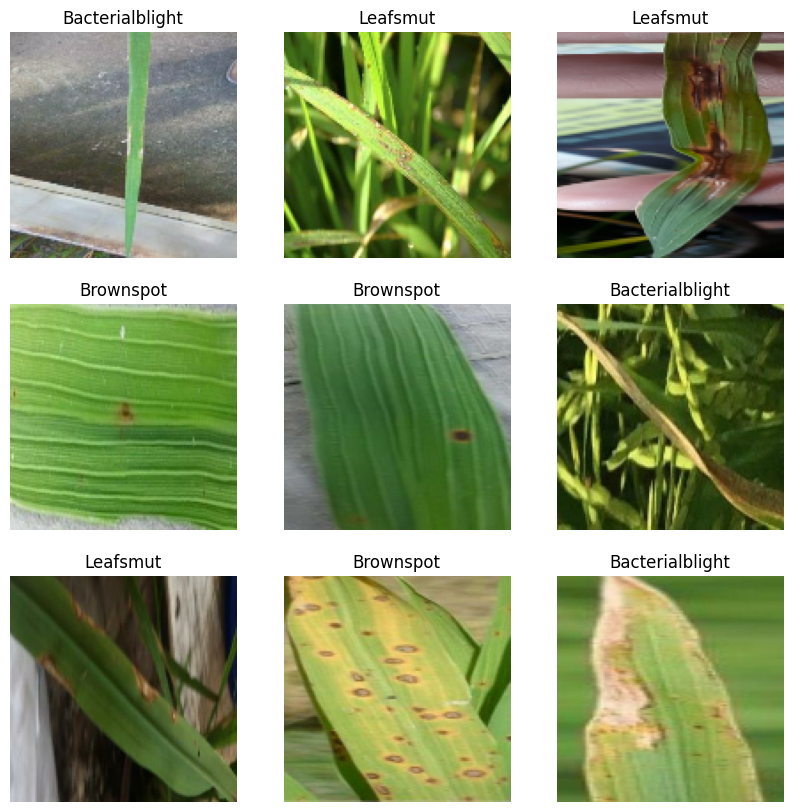

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model Architecture

In [ ]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model Training

In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10)

Epoch 1/10
118/118 [==============================] - 23s 114ms/step - loss: 0.6549 - accuracy: 0.7383 - val_loss: 0.4396 - val_accuracy: 0.8323
Epoch 2/10
118/118 [==============================] - 2s 13ms/step - loss: 0.3312 - accuracy: 0.8773 - val_loss: 0.2380 - val_accuracy: 0.9156
Epoch 3/10
118/118 [==============================] - 1s 13ms/step - loss: 0.1687 - accuracy: 0.9453 - val_loss: 0.0894 - val_accuracy: 0.9776
Epoch 4/10
118/118 [==============================] - 2s 15ms/step - loss: 0.1052 - accuracy: 0.9693 - val_loss: 0.0992 - val_accuracy: 0.9722
Epoch 5/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0736 - accuracy: 0.9747 - val_loss: 0.0671 - val_accuracy: 0.9744
Epoch 6/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0367 - val_accuracy: 0.9861
Epoch 7/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0338 - val_accuracy: 0.99

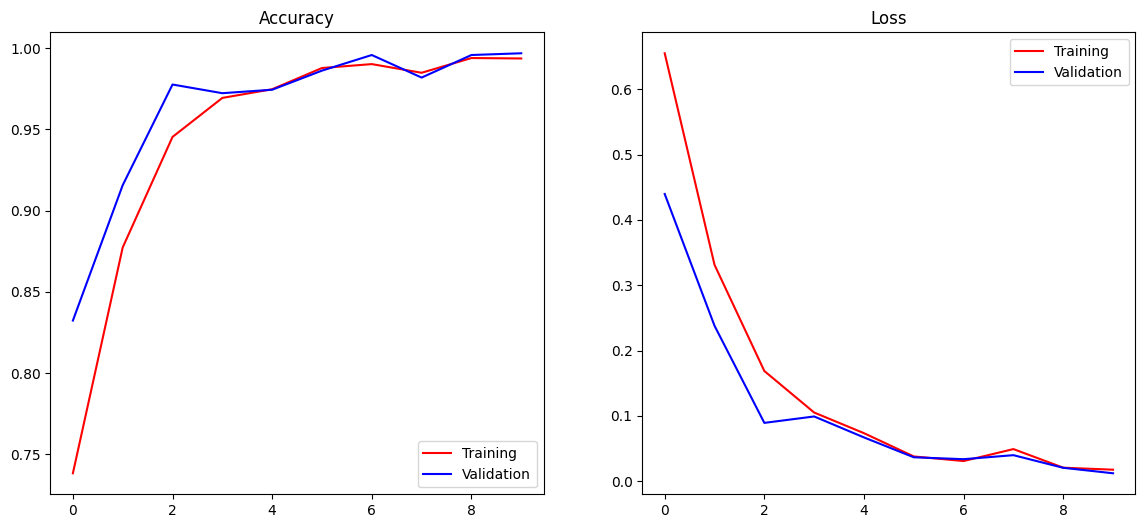

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(epochs, acc, 'r', label='Training')
axs[0].plot(epochs, val_acc, 'b', label='Validation')
axs[0].set_title('Accuracy')
axs[0].legend()

axs[1].plot(epochs, loss, 'r', label='Training')
axs[1].plot(epochs, val_loss, 'b', label='Validation')
axs[1].set_title('Loss')
axs[1].legend();

## Prediction

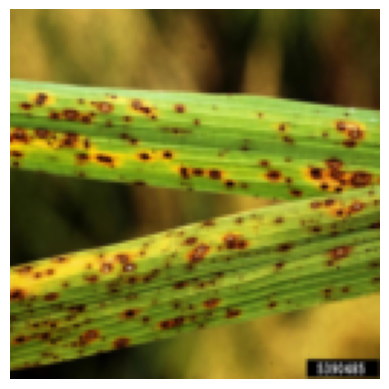

In [ ]:
image_file = '/content/drive/MyDrive/Colab Notebooks/Dataset/rice leaf diseases/sample_image.jpg'

image = load_img(image_file, target_size=(128, 128), interpolation='bilinear')
plt.imshow(image)
plt.axis('off');

In [ ]:
input_arr = img_to_array(image)
predictions = model.predict(np.array([input_arr]), verbose=0)
class_names[np.argmax(predictions)]

'Brownspot'